In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# from datasets import load_dataset

# dataset = load_dataset("yelp_review_full")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pickle
# with open('yelp_dataset.pkl', 'wb') as file:
#     pickle.dump(dataset, file)

In [4]:
with open('dbpedia.pkl', 'rb') as file:
    dataset = pickle.load(file)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'content'],
        num_rows: 560000
    })
    test: Dataset({
        features: ['label', 'title', 'content'],
        num_rows: 70000
    })
})


In [8]:
train_dataset = dataset['train']
test_dataset = dataset['test']

# Convert train and test datasets to arrays
train_data_title = train_dataset['title']
train_data_content = train_dataset['content']
train_labels = train_dataset['label']
test_data_title = test_dataset['title']
test_data_content = test_dataset['content']
test_labels = test_dataset['label']

In [6]:
# print(train_data_title[0])
# print(train_data_content[0])
# print(train_labels[0])


In [9]:
# train_data = train_data_title + train_data_content
# test_data = test_data_title + test_data_content

train_data = [None] * len(train_data_title)
for i in range(len(train_data_title)):
    train_data[i] = train_data_title[i] + train_data_content[i]

test_data = [None] * len(test_data_title)
for i in range(len(test_data_title)):
    test_data[i] = test_data_title[i] + test_data_content[i]

## Preprocess

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/revanthgundam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/revanthgundam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import sys  
!{sys.executable} -m pip install contractions
import contractions


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [10]:
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')

# def custom_contractions_fix(text):
#     # Define custom contractions to expand
#     contractions_dict = {
#         "don't": "do not",
#         "doesn't": "does not",
#         "didn't": "did not",
#         # Add more contractions as needed
#     }
    
#     # Use a regular expression to find and replace contractions
#     contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    
#     def replace(match):
#         return contractions_dict[match.group(0)]
    
#     expanded_text = contractions_re.sub(replace, text)
#     return expanded_text


# def tokenize_text(text):
    
#     # if there is a word between () then write it twice
#     text = re.sub(r'\((.*?)\)', r'\1 \1', text)
    
#     # Apply custom contractions expansion
#     text = custom_contractions_fix(text)
    
#     # Replace hyphens with spaces
#     text = text.replace('-', ' ')
    
#     tokens = nltk.word_tokenize(text)
    
#     # Add an extra occurrence for all-uppercase words with more than one letter
#     temp = [word for word in tokens if len(word) > 1 and word.isupper()]
#     tokens.extend(temp)
    
#     # Convert to lowercase
#     tokens = [w.lower() for w in tokens]
    
#     # Remove periods
#     tokens = [w.replace('.', '') for w in tokens]
    
#     # Remove punctuation and stopwords
#     stop_words = set(stopwords.words("english"))
#     tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
#     return tokens



In [11]:
# # print(tokenize_text(train_data[10]))

# tokens = []
# print(len(train_data))

# for i in range(len(train_data)):
#     tokens.append(tokenize_text(train_data[i]))
#     if i % 1000 == 0:
#         print(i)

# # save to pkl file
# with open('dbpedia_train_tokens_no_stop.pkl', 'wb') as file:
#     pickle.dump(tokens, file)

In [12]:
# import pickle
# from collections import Counter

# # Load the tokenized data
# with open('dbpedia_train_tokens_no_stop.pkl', 'rb') as file:
#     tokens = pickle.load(file)

# # Define the frequency cutoff threshold
# frequency_cutoff = 30

# # Count word frequencies
# word_counts = Counter(word for tokens_list in tokens for word in tokens_list)

# # Filter out words with counts less than the threshold
# filtered_tokens = [[word for word in tokens_list if word_counts[word] >= frequency_cutoff] for tokens_list in tokens]

# # Save the filtered tokens to a new file
# with open('dbpedia_train_tokens_filtered.pkl', 'wb') as file:
#     pickle.dump(filtered_tokens, file)

In [13]:
# tokens_test = []
# print(len(test_data))

# for i in range(len(test_data)):
#     tokens_test.append(tokenize_text(test_data[i]))
#     if i % 1000 == 0:
#         print(i)

# with open('dbpedia_test_tokens_no_stop.pkl', 'wb') as file:
#     pickle.dump(tokens_test, file)

In [14]:
# import pickle
# from collections import Counter

# # Load the tokenized data
# with open('dbpedia_test_tokens_no_stop.pkl', 'rb') as file:
#     tokens = pickle.load(file)

# # Define the frequency cutoff threshold
# frequency_cutoff = 30

# # Count word frequencies
# word_counts = Counter(word for tokens_list in tokens for word in tokens_list)

# # Filter out words with counts less than the threshold
# filtered_tokens = [[word for word in tokens_list if word_counts[word] >= frequency_cutoff] for tokens_list in tokens]

# # Save the filtered tokens to a new file
# with open('dbpedia_test_tokens_filtered.pkl', 'wb') as file:
#     pickle.dump(filtered_tokens, file)

In [12]:
import numpy as np

train_tokens = []
with open('dbpedia_train_tokens_filtered.pkl', 'rb') as file:
    train_tokens = pickle.load(file)

test_tokens = []
with open('dbpedia_test_tokens_filtered.pkl', 'rb') as file:
    test_tokens = pickle.load(file)
    
print("Loaded tokens")



Loaded tokens


In [13]:
# in train data replace every 1000th word with UNK randomly

import random

for i in range(len(train_tokens)):
    for j in range(len(train_tokens[i])):
        if random.randint(1, 1000) == 1:
            train_tokens[i][j] = 'UNK'
        

In [14]:
# Build the BoW representation manually
# Create a vocabulary by collecting unique words from the training data
vocab = set()
for tokens in train_tokens:
    vocab.update(tokens)

# Create a dictionary to map words to indices in the vocabulary
vocab_dict = {}
for i, word in enumerate(vocab):
    vocab_dict[word] = i

print(len(vocab_dict))
# Initialize BoW matrices for training and testing data


36315


In [15]:
# randomize the order of the training data and the testing data along with their labels with a specific seed
import random

random_seed = 42

train_data = []
new_train_labels = []

test_data = []
new_test_labels = []

for i in range(len(train_tokens)):
    train_data.append(train_tokens[i])
    new_train_labels.append(train_labels[i])

for i in range(len(test_tokens)):
    test_data.append(test_tokens[i])
    new_test_labels.append(test_labels[i])

# shuffle the data
random.seed(random_seed)
temp = list(zip(train_data, new_train_labels))
random.shuffle(temp)
train_data, train_labels = zip(*temp)

random.seed(random_seed)
temp = list(zip(test_data, new_test_labels))
random.shuffle(temp)
test_data, test_labels = zip(*temp)

# convert them back to the format of train_tokens and test_tokens
train_tokens = list(train_data)
train_labels = list(train_labels)
test_tokens = list(test_data)
test_labels = list(test_labels)


In [16]:
# # save the shuffled data
# with open('dbpedia_train_tokens_filtered_shuffled.pkl', 'wb') as file:
#     pickle.dump(train_tokens, file)

# with open('dbpedia_train_labels_filtered_shuffled.pkl', 'wb') as file:
#     pickle.dump(train_labels, file)

# with open('dbpedia_test_tokens_filtered_shuffled.pkl', 'wb') as file:
#     pickle.dump(test_tokens, file)

# with open('dbpedia_test_labels_filtered_shuffled.pkl', 'wb') as file:
#     pickle.dump(test_labels, file)

# Load the tokenized data
with open('dbpedia_train_tokens_filtered_shuffled.pkl', 'rb') as file:
    train_tokens = pickle.load(file)

with open('dbpedia_train_labels_filtered_shuffled.pkl', 'rb') as file:
    train_labels = pickle.load(file)

with open('dbpedia_test_tokens_filtered_shuffled.pkl', 'rb') as file:
    test_tokens = pickle.load(file)

with open('dbpedia_test_labels_filtered_shuffled.pkl', 'rb') as file:
    test_labels = pickle.load(file)

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

num_epochs = 4
learning_rate = 0.01
batch_size = 10000

class BoWClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(BoWClassifier, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Pass the input through the linear layer
        out = self.linear(x)
        return out
    
# Define the model
input_size = len(vocab)  # Input size is the size of the vocabulary
output_size = 14  # Output size is 13 dimensions

model = BoWClassifier(input_size, output_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
import numpy as np
from collections import Counter
from math import log

def calculate_tfidf(tokens, vocab_dict):

    n_docs = len(tokens)
    vocab_size = len(vocab_dict)
    
    # Calculate document frequencies (DF) for each word
    doc_freq = Counter()
    for doc in tokens:
        doc_freq.update(set(doc))
    
    # Precompute IDF values
    idf_dict = {}
    for word, count in doc_freq.items():
        idf_dict[word] = log(n_docs / (count + 1))  # Add 1 to avoid division by zero
    
    tfidf_matrix = np.zeros((n_docs, vocab_size))
    
    for i, doc in enumerate(tokens):
        # if i % 1000 == 0:
        #     print(i)
        
        total_words_in_doc = len(doc)
        term_freq = Counter(doc)  # Calculate term frequency (TF) for the document
        
        for word, tf in term_freq.items():
            if word in vocab_dict:
                tfidf_matrix[i][vocab_dict[word]] = (tf / total_words_in_doc) * idf_dict[word]
            else:
                # Use 'UNK' if the word is not in the vocabulary
                tfidf_matrix[i][vocab_dict['UNK']] = (tf / total_words_in_doc) * idf_dict[word]
    
    return tfidf_matrix

In [22]:
# Training loop
for epoch in range(num_epochs):
    total = 0
    correct = 0
    for i in range(0, len(train_tokens), batch_size):
        
        inputs = train_tokens[i:i + batch_size]
        # print(len(inputs))
        # print(len(vocab))
        
        # make bow vector for inputs
        # bow = torch.zeros((batch_size, len(vocab)), dtype=torch.float32)
        # # print(bow.shape)
        # for j in range(batch_size):
        #     for token in inputs[j]:

        #         bow[j][vocab_dict[token]] += 1

        bow = calculate_tfidf(inputs, vocab_dict)

        
        # convert bow to tensor
        inputs = torch.tensor(bow, dtype=torch.float32).to(device)
        
        labels = train_labels[i:i + batch_size]  # Make sure to have train_labels defined
        # Convert labels to LongTensors
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()

        # Update weights
        optimizer.step()

        # calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


        # Print the loss for this batch if needed
        print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i//batch_size+1}], Loss: {loss.item()}')

    print(f'Accuracy of the network on the {total} train inputs: {100 * correct / total} %')

print('Training finished')

Epoch [1/4], Batch [1], Loss: 2.6388494968414307
Epoch [1/4], Batch [2], Loss: 2.588744878768921
Epoch [1/4], Batch [3], Loss: 2.5391180515289307
Epoch [1/4], Batch [4], Loss: 2.489314556121826
Epoch [1/4], Batch [5], Loss: 2.4398436546325684
Epoch [1/4], Batch [6], Loss: 2.3909718990325928
Epoch [1/4], Batch [7], Loss: 2.340740919113159
Epoch [1/4], Batch [8], Loss: 2.292851448059082
Epoch [1/4], Batch [9], Loss: 2.2467446327209473
Epoch [1/4], Batch [10], Loss: 2.1976256370544434
Epoch [1/4], Batch [11], Loss: 2.152862310409546
Epoch [1/4], Batch [12], Loss: 2.104461431503296
Epoch [1/4], Batch [13], Loss: 2.0598862171173096
Epoch [1/4], Batch [14], Loss: 2.0156192779541016
Epoch [1/4], Batch [15], Loss: 1.971560001373291
Epoch [1/4], Batch [16], Loss: 1.9302208423614502
Epoch [1/4], Batch [17], Loss: 1.881575584411621
Epoch [1/4], Batch [18], Loss: 1.8424794673919678
Epoch [1/4], Batch [19], Loss: 1.8020232915878296
Epoch [1/4], Batch [20], Loss: 1.7590304613113403
Epoch [1/4], Batc

In [19]:
# Save the model
# torch.save(model.state_dict(), 'dbpedia_model_tfidf.ckpt')

# Load the model
model = BoWClassifier(input_size, output_size).to(device)
model.load_state_dict(torch.load('dbpedia_model_tfidf.ckpt'))


<All keys matched successfully>

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Test the model
with torch.no_grad():
    total = 0
    correct = 0
    predictions = []
    true_labels = []

    for i in range(0, len(test_tokens), batch_size):
        inputs = test_tokens[i:i + batch_size]
        # bow = torch.zeros((batch_size, len(vocab)), dtype=torch.float32)

        # for j in range(batch_size):
        #     for token in inputs[j]:
        #         if token in vocab_dict:
        #             bow[j][vocab_dict[token]] += 1
        #         else:
        #             bow[j][vocab_dict['UNK']] += 1

        bow = calculate_tfidf(inputs, vocab_dict)

        inputs = torch.tensor(bow, dtype=torch.float32).to(device)
        labels = test_labels[i:i + batch_size]
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect predictions and true labels
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the {total} test inputs: {accuracy} %')

    # Calculate confusion matrix, precision, recall, and F1 scores
    confusion = confusion_matrix(true_labels, predictions)
    classification_rep = classification_report(true_labels, predictions, target_names=[str(i) for i in range(14)])
    f1_micro = f1_score(true_labels, predictions, average='micro')
    f1_macro = f1_score(true_labels, predictions, average='macro')
    f1_weighted = f1_score(true_labels, predictions, average='weighted')
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)
    # print("F1 Micro:", f1_micro)
    # print("F1 Macro:", f1_macro)
    # print("F1 Weighted:", f1_weighted)
    # print("Precision:", precision)
    # print("Recall:", recall)


Accuracy of the network on the 70000 test inputs: 7.615714285714286 %
Confusion Matrix:
[[ 522  299  390  142  225  276  364   83   97  273  201  274 1007  847]
 [ 562  307  299  206  225  505  154  142   84  269  197  184 1035  831]
 [ 558  567  508  178  136  200  320  132  123  138  160  269  814  897]
 [1114  475  581  193  173  293  241  162  193  122   97  205  578  573]
 [ 659  688  488  170  118  213  197  290  130  277  136  285  969  380]
 [ 523  338  898  127  119  265  280   72   64  319  125  317 1116  437]
 [ 486  295  453  174  196  229  375  164   66  119  138  334 1484  487]
 [ 597 1465  474  184  311  116  137   33   63   53  396  201  504  466]
 [ 573  473  273   72  366  133  319  133  219  310  197  211  740  981]
 [ 514  563  387  761   97  257  305  137  132  258  204  232  641  512]
 [ 763  266  371  259  117  527  205  153  161  357  225  290  827  479]
 [ 516  950  280  201  133  411  415  220   76  144  121  304  582  647]
 [ 493  418  454  259  155  246  269

In [27]:
# get the misclassifications and print few of them
misclassified = []
for i in range(len(true_labels)):
    if true_labels[i] != predictions[i]:
        misclassified.append(i)

print("Number of misclassifications:", len(misclassified))

Number of misclassifications: 2714


In [28]:
for i in range(10):
    print("Misclassified example:")
    print("True label:", true_labels[misclassified[i]])
    print("Predicted label:", predictions[misclassified[i]])
    print("Text:", test_data[misclassified[i]])
    print("")

Misclassified example:
True label: 4
Predicted label: 2
Text: ['kamal', 'kamal', 'born', 'born', 'renowned', 'social', 'worker']

Misclassified example:
True label: 4
Predicted label: 0
Text: ['native', 'spain', 'spanish', 'governor', 'general', 'philippines', 'december', 'march', 'among', 'archipelago', 'account', 'ability', 'public', 'welfare', 'especially', 'active', 'building', 'providing', 'means', 'communication', 'bring', 'inland', 'maritime', 'provinces', 'communication']

Misclassified example:
True label: 8
Predicted label: 13
Text: ['buddha', 'image', 'buddha', 'image', 'record', 'base', 'bronze', 'image', 'buddha', 'recording', 'wife', 'assigned', 'fifth', 'ce', 'ce']

Misclassified example:
True label: 0
Predicted label: 1
Text: ['network', 'science', 'center', 'network', 'science', 'center', 'founded', 'october', 'professor', 'indiana', 'university', 'center', 'mission', 'advance', 'tools', 'study', 'social', 'science', 'physics', 'networks']

Misclassified example:
True 

In [29]:
# Initialize a dictionary to store length-wise statistics
length_correct_total = {}

# Test the model
with torch.no_grad():
    model.eval()
    total = 0
    correct = 0
    predictions = []
    true_labels = []

    for i in range(0, len(test_tokens), batch_size):
        inputs = test_tokens[i:i + batch_size]
        bow = torch.zeros((batch_size, len(vocab)), dtype=torch.float32)

        for j in range(batch_size):
            for token in inputs[j]:
                if token in vocab_dict:
                    bow[j][vocab_dict[token]] += 1
                else:
                    bow[j][vocab_dict['UNK']] += 1

        inputs = torch.tensor(bow, dtype=torch.float32).to(device)
        labels = test_labels[i:i + batch_size]
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect predictions and true labels
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

        # Update length-wise statistics
        for j in range(len(inputs)):
            length = int(torch.sum(inputs[j] != 0).item())
            # print(length)
            if length not in length_correct_total:
                length_correct_total[length] = [0, 0]
            if predicted[j] == labels[j]:
                length_correct_total[length][0] += 1
            length_correct_total[length][1] += 1

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the {total} test inputs: {accuracy} %')

# Analyze length-wise statistics
for length, (correct_predictions, total_predictions) in length_correct_total.items():
    accuracy = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
    print(f"Length {length} - Accuracy: {accuracy:.2f}% (Correct: {correct_predictions}, Total: {total_predictions})")


/var/folders/31/d7g63tw141g81ynhx4f_hngr0000gn/T/ipykernel_26630/1777643572.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(bow, dtype=torch.float32).to(device)


Accuracy of the network on the 70000 test inputs: 96.46 %
Length 24 - Accuracy: 95.78% (Correct: 2295, Total: 2396)
Length 16 - Accuracy: 96.68% (Correct: 2479, Total: 2564)
Length 19 - Accuracy: 96.47% (Correct: 2375, Total: 2462)
Length 9 - Accuracy: 97.35% (Correct: 2090, Total: 2147)
Length 8 - Accuracy: 97.11% (Correct: 1986, Total: 2045)
Length 25 - Accuracy: 95.89% (Correct: 2311, Total: 2410)
Length 10 - Accuracy: 97.04% (Correct: 2099, Total: 2163)
Length 23 - Accuracy: 95.83% (Correct: 2435, Total: 2541)
Length 32 - Accuracy: 96.65% (Correct: 1268, Total: 1312)
Length 22 - Accuracy: 95.50% (Correct: 2376, Total: 2488)
Length 31 - Accuracy: 95.47% (Correct: 1517, Total: 1589)
Length 27 - Accuracy: 96.15% (Correct: 2196, Total: 2284)
Length 21 - Accuracy: 96.18% (Correct: 2520, Total: 2620)
Length 33 - Accuracy: 97.07% (Correct: 1028, Total: 1059)
Length 35 - Accuracy: 96.27% (Correct: 620, Total: 644)
Length 17 - Accuracy: 96.54% (Correct: 2347, Total: 2431)
Length 14 - Accura

Length 0 - Accuracy: 0.00% (Correct: 0, Total: 0)
Length 10 - Accuracy: 97.26% (Correct: 15104, Total: 15530)
Length 20 - Accuracy: 96.68% (Correct: 23672, Total: 24484)
Length 30 - Accuracy: 95.82% (Correct: 22075, Total: 23037)
Length 40 - Accuracy: 96.05% (Correct: 6489, Total: 6756)
Length 50 - Accuracy: 95.40% (Correct: 166, Total: 174)
Length 60 - Accuracy: 90.91% (Correct: 10, Total: 11)
Length 70 - Accuracy: 80.00% (Correct: 4, Total: 5)
Length 80 - Accuracy: 50.00% (Correct: 1, Total: 2)


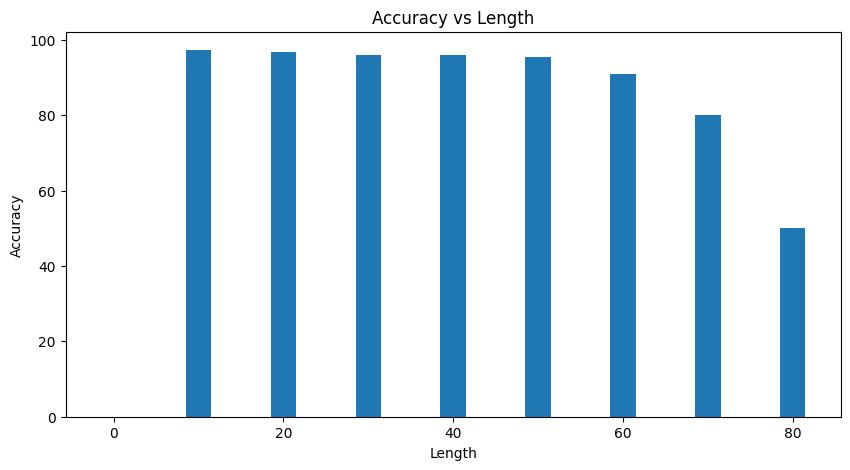

In [34]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
length_correct_total_binned = {bin: [0, 0] for bin in bins}
for lenght, (correct_predictions, total_predictions) in length_correct_total.items():
    for bin in bins:
        if lenght <= bin:
            length_correct_total_binned[bin][0] += correct_predictions
            length_correct_total_binned[bin][1] += total_predictions
            break

for bin, (correct_predictions, total_predictions) in length_correct_total_binned.items():
    accuracy = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
    print(f"Length {bin} - Accuracy: {accuracy:.2f}% (Correct: {correct_predictions}, Total: {total_predictions})")

# plot length-wise statistics
import matplotlib.pyplot as plt

lengths = [length for length in length_correct_total_binned.keys()]
accuracies = [correct_predictions / total_predictions * 100 if total_predictions > 0 else 0 for _, (correct_predictions, total_predictions) in length_correct_total_binned.items()]

plt.figure(figsize=(10, 5))
plt.bar(lengths, accuracies, width=3)
plt.xlabel("Length")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Length")
plt.show()



In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_tfidf_impact(model, test_data, test_tokens, true_labels, predictions, index, vocab_dict):
    # Get the input sequence and true/predicted labels
    input_sequence = test_data[index]
    true_label = true_labels[index]
    predicted_label = predictions[index]

    # Get the TF-IDF representation of the input sequence
    tfidf_representation = calculate_tfidf([test_tokens[index]], vocab_dict)

    # Convert TF-IDF representation to a tensor
    tfidf_input = torch.tensor(tfidf_representation, dtype=torch.float32).to(device)

    # Get the output probabilities from the model
    output_probs = model(tfidf_input).softmax(dim=1).detach().cpu().numpy()

    # Plot the impact of TF-IDF on classification
    plt.figure(figsize=(12, 4))
    
    # Plot TF-IDF values
    plt.subplot(1, 2, 1)
    sns.heatmap(tfidf_representation, cmap="YlGnBu", annot=True, xticklabels=list(vocab_dict.keys()), yticklabels=['TF-IDF'])
    plt.title('TF-IDF Representation')
    
    # Plot predicted probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(output_probs.shape[1]), output_probs.squeeze(), color='green', alpha=0.7)
    plt.title(f'Predicted Probabilities (True: {true_label}, Predicted: {predicted_label})')
    plt.xlabel('Class Index')
    plt.ylabel('Probability')

    plt.suptitle('Impact of TF-IDF on Classification')
    plt.show()

# Choose an index of an example
misclassified_index = misclassified[0]

# Visualize the impact of TF-IDF on classification for the selected example
visualize_tfidf_impact(model, test_data, test_tokens, true_labels, predictions, misclassified_index, vocab_dict)


/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 24499 (\N{CJK UNIFIED IDEOGRAPH-5FB3}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 26666 (\N{CJK UNIFIED IDEOGRAPH-682A}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from current font.
  fig.

KeyboardInterrupt: 

/Users/revanthgundam/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24499 (\N{CJK UNIFIED IDEOGRAPH-5FB3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/revanthgundam/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/revanthgundam/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/revanthgundam/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/revanthgundam/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: Us

In [ ]:
weights = model.linear.weight.detach().cpu().numpy()

# Match each weight with its corresponding word in the vocabulary
word_weights = dict(zip(vocab, weights[0]))

sorted_words = sorted(word_weights.items(), key=lambda x: x[1], reverse=True)

# Print top 10 words
for word, weight in sorted_words[:10]:
    print(f'Word: {word:10} | Weight: {weight:.2f}')